# Exploration of prosper loan data
In this notebook I'll organize my exploration and grab the data.

In [1]:
# First of all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Knowing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# Default color to seaborn
color = sb.color_palette()[0]

In [6]:
labels = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 
'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 
'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 
'RV', 'Taxes', 'Vacation', 'Wedding Loans']

df['ListingCategory'] = df['ListingCategory (numeric)'].apply(lambda x: labels[x])
df['ListingCategory'].head()

0       Not Available
1    Home Improvement
2       Not Available
3          Motorcycle
4    Home Improvement
Name: ListingCategory, dtype: object

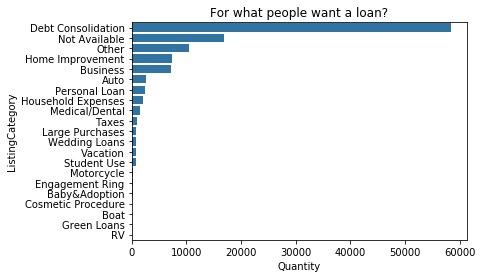

In [7]:
counts = df['ListingCategory'].value_counts()
sb.countplot(data=df, y='ListingCategory', color=color, order=counts.index)
plt.xlabel('Quantity')
plt.title('For what people want a loan?');

### Univariable 
Here we clearly could see that mostly people get a loan for debt consolidation, this is interesting, seen this, Prosper could improve your maketing's public with this.

In [8]:
most_loan = counts[:5].index
sub_df = df[df['ListingCategory'].isin(most_loan)].copy()

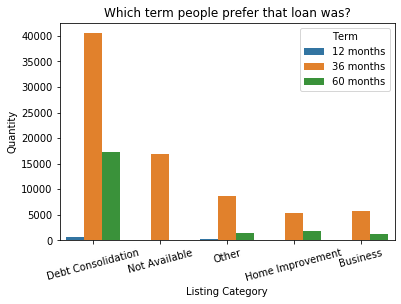

In [9]:
counts_sub = sub_df['ListingCategory'].value_counts()
g = sb.countplot(data=sub_df, x='ListingCategory', hue='Term', order=counts_sub.index)
g.set_xlabel('Listing Category')
g.set_ylabel('Quantity')
plt.title('Which term people prefer that loan was?')
plt.legend(['12 months','36 months','60 months'], title='Term')
plt.xticks(rotation = 15);

**Looking**
Many people prefer 36 months than others this in whole plot list.

In [10]:
# Converting ListingCreationDate of object to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [11]:
df['ListingYear'] = df['ListingCreationDate'].apply(lambda x: x.year)

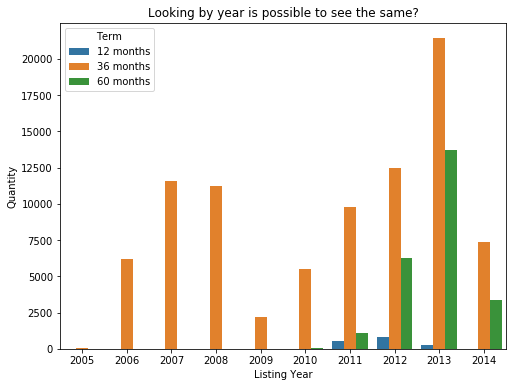

In [126]:
plt.figure(figsize=(8,6))
sb.countplot(data=df, x='ListingYear', hue='Term')
plt.title('Looking by year is possible to see the same?')
plt.xlabel('Listing Year')
plt.ylabel('Quantity')
plt.legend(['12 months', '36 months', '60 months'], loc='upper left', title='Term');

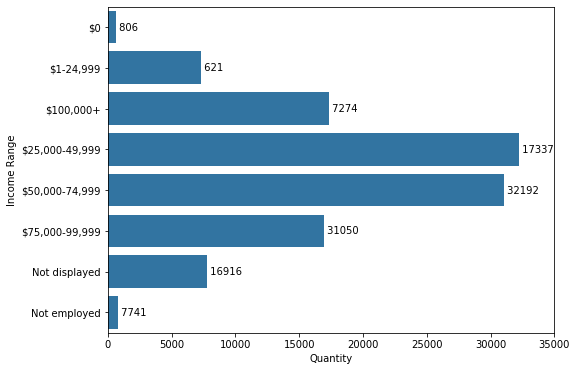

In [125]:
#order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not displayed','Not employed']
income_counts = df['IncomeRange'].value_counts()

plt.figure(figsize=(8,6))
sb.countplot(data=df, y='IncomeRange',color=color, order=income_counts.sort_index().index)

dist = income_counts.sort_index()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    pct_string = (' {} '.format(count))
    count = dist[label.get_text()]
    plt.text(count, loc, pct_string, va='center')

plt.xticks(np.arange(0, 40000, 5000))
plt.xlabel('Quantity')
plt.ylabel('Income Range')
plt.title('');